In [1]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
# Check the null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

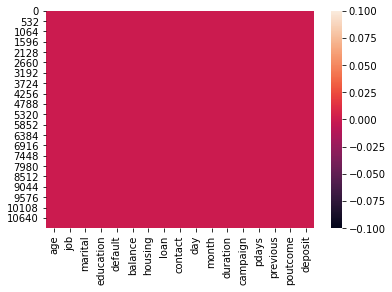

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [5]:
# Check the Datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
# Select the Input X and Output Y from given dataset df
X = df.drop("deposit",axis=1)  # Input features
Y = df["deposit"] # Output features

In [7]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
# Create user defined function
def create_model(model):   # There model user defined object
    model.fit(X_train,Y_train)   # Train the model
    Y_pred = model.predict(X_test)  # Test the model
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [9]:
# Create a baseline model
# 1. Use Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
#Create a object of LogsiticRegression class
lr = LogisticRegression()

In [11]:
# Call the Function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.77      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349

Confusion Matrix : 
[[1404  356]
 [ 428 1161]]


In [12]:
#here recall =0.73 means 73% it is good score  ,but we try ,
#can much more better to this score
#region behind less score : - model is overfit 

#we use second classification algorithm decisiontreeclassifier : 
#DecisionTree help select imp input features 
#top predict the output

#call decisiontreeclassifier class
from sklearn.tree import DecisionTreeClassifier  #DecisionTreeClassifier inbuilt class

In [13]:
# Create a object of class descisiontree classifier
dt = DecisionTreeClassifier()

In [14]:
# Call function
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

Confusion Matrix : 
[[1420  340]
 [ 358 1231]]


In [15]:
#Lets check out what are the important input features that are selected by 
#the decisiontree Information gain or gini index : -
#we use inbuilt method feature_importances_ of DecisionTreeClassifier class
#(show reduction 
#and select highest reduction)
dt.feature_importances_

array([0.08114131, 0.03419901, 0.01840674, 0.01235337, 0.00084141,
       0.08601815, 0.04359718, 0.0053796 , 0.06279962, 0.0796693 ,
       0.09492911, 0.3468565 , 0.02163445, 0.06312778, 0.01295053,
       0.03609595])

In [16]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [17]:
# Create Decision tree
#from sklearn import tree
#features = X.columns
#fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt,feature_names=features,filled=True)

In [18]:
#But we got less score 0.76 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter
#leaf means no child

In [19]:
# 1. max_depth parameter
# Create object of DecisionTreeClassifier class
dt1 = DecisionTreeClassifier(max_depth=5)
# Note : max_depth can not more than 8
# by default : use method : gini index

In [20]:
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

Confusion Matrix : 
[[1316  444]
 [ 228 1361]]


In [21]:
dt1.feature_importances_

array([0.02684597, 0.        , 0.        , 0.00285266, 0.        ,
       0.00104007, 0.06633719, 0.00376208, 0.11972821, 0.00351189,
       0.05243751, 0.57641262, 0.00098173, 0.09292069, 0.00204263,
       0.05112675])

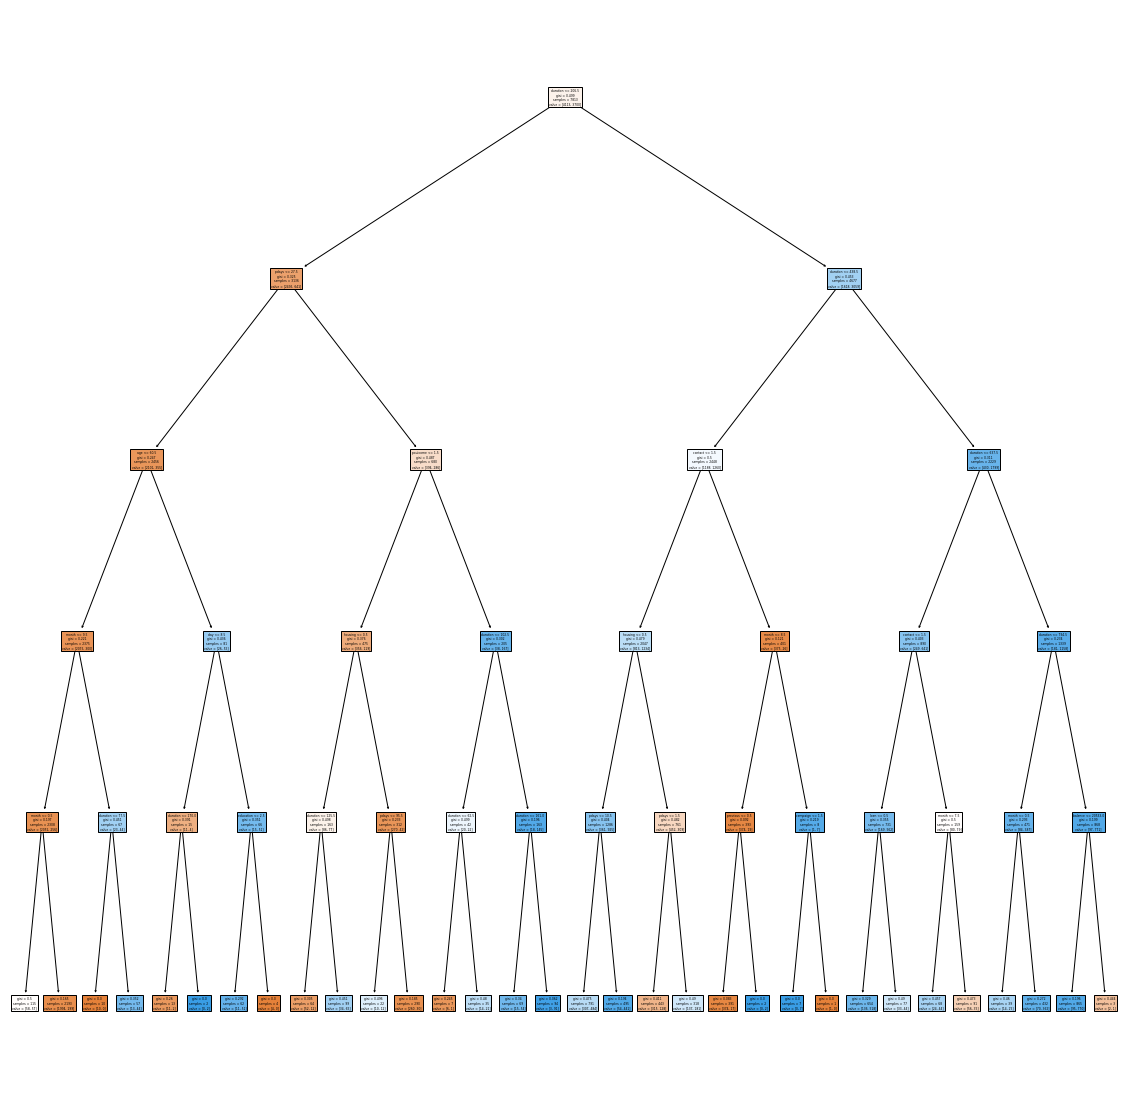

In [22]:
from sklearn import tree
features = X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [23]:
#2nd purning technique : min_samples_leaf
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50

In [24]:
# Call the function
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

Confusion Matrix : 
[[1378  382]
 [ 204 1385]]


In [25]:
dt2.feature_importances_

array([4.36918907e-02, 4.95240256e-03, 0.00000000e+00, 2.72000182e-03,
       0.00000000e+00, 1.83109135e-02, 6.87021002e-02, 3.16524343e-03,
       1.06134282e-01, 4.28386407e-03, 1.09344494e-01, 4.98980114e-01,
       3.79287934e-04, 4.34441889e-02, 2.23765454e-02, 7.35146712e-02])

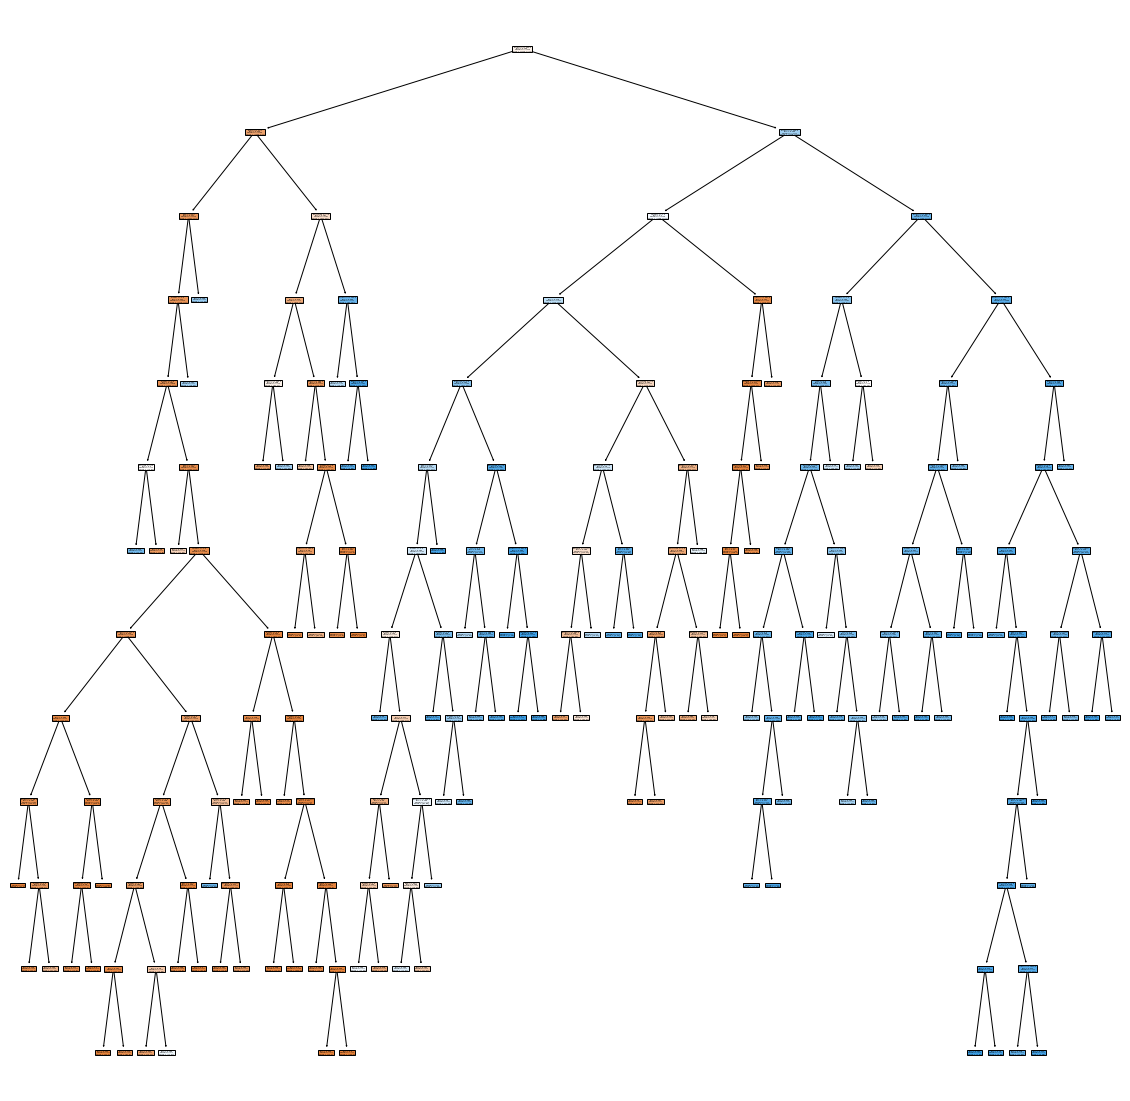

In [26]:
from sklearn import tree
features = X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [27]:
#use entropy method of decisiontree means -P(yes)*log2P(yes)-P(No)log2(P(no))

##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [28]:
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Confusion Matrix : 
[[1450  310]
 [ 285 1304]]


In [29]:
dt3.feature_importances_

array([0.02078675, 0.00962947, 0.00090744, 0.0018021 , 0.        ,
       0.02848043, 0.06001505, 0.0026556 , 0.14409574, 0.01424582,
       0.10880883, 0.5097615 , 0.00813448, 0.05244128, 0.01455222,
       0.02368328])

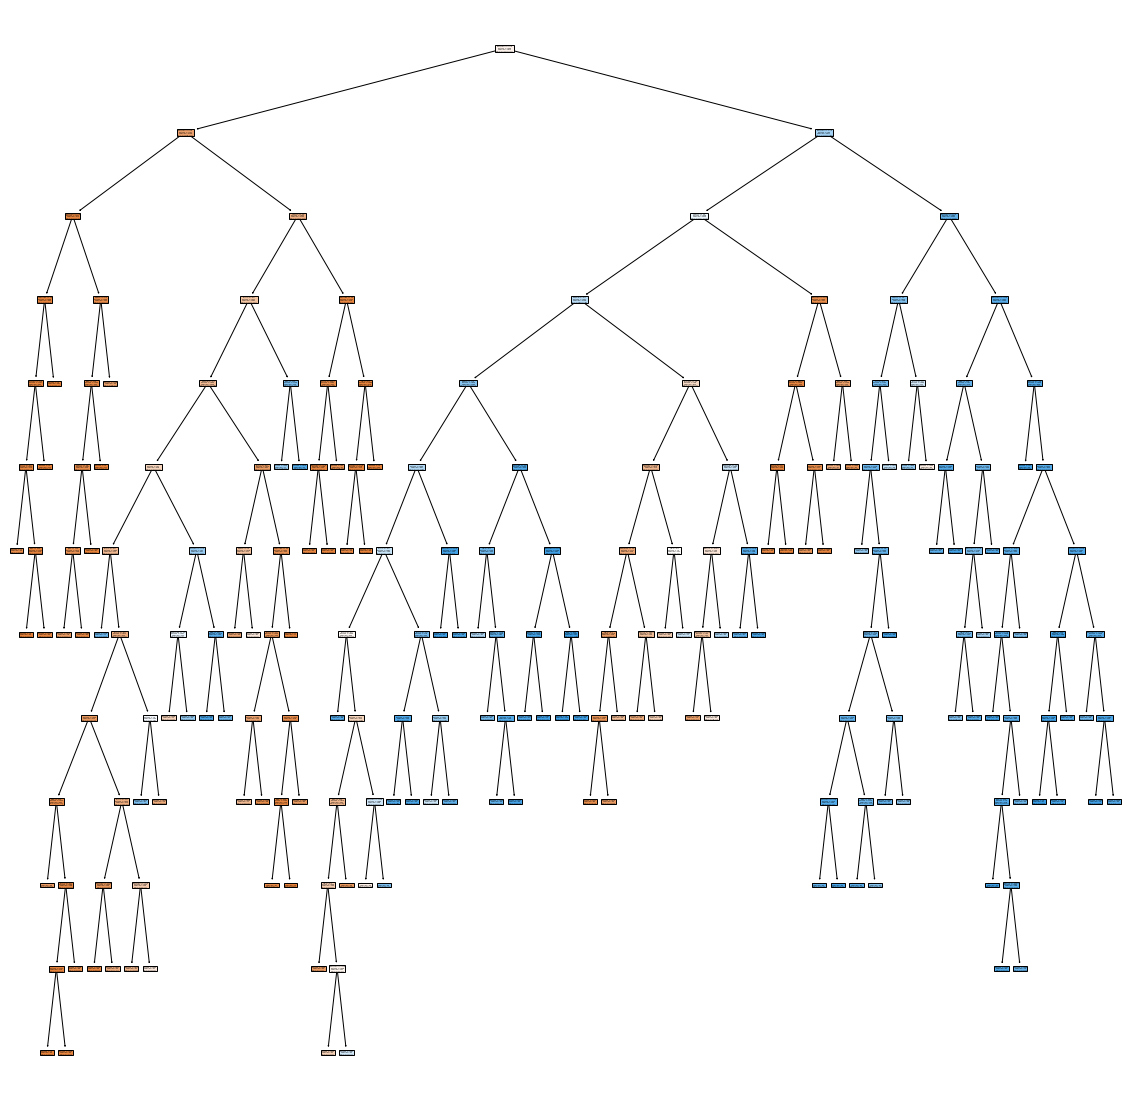

In [30]:
from sklearn import tree
features = X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [31]:
# NOTE :  DecisionTreeClassifier With min_samples_leaf and gini index 